# Análisis exploratorio
---

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns;
sns.set()

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [3]:
df_minsait = pd.read_csv('data/Modelar_UH2020.txt', sep="|", index_col='ID', encoding='utf-8')
print("Tamaño del conjunto de datos:  %d" % df_minsait.shape[0])
print("Número de variables: %d" % df_minsait.shape[1])
if df_minsait.index.is_unique:
    print('El índice es único.')
else:
    print('Los índices están duplicados.')
df_minsait.head()

Tamaño del conjunto de datos:  103230
Número de variables: 55
El índice es único.


,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,Q_R_4_0_7,...,Q_NIR_8_1_0,AREA,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4,CONTRUCTIONYEAR,MAXBUILDINGFLOOR,CADASTRALQUALITYID,CLASE
ID,,,,,,,,,,,,,,,,,,,,,
35984B9C3E7CD9A1,2207357872,165920300,0.000000,443.001300,616.001697,746.998401,872.996472,1009.000946,1159.002319,1342.002466,...,10951.926645,144.426900,0.557237,0.067249,0.057372,0.853127,2002,0.0,2,RESIDENTIAL
F9D04BF6D037F8FB,2189757160,165463267,0.000059,443.899011,627.999060,770.001611,904.999988,1032.998474,1165.001636,1316.000110,...,7048.367637,38.342550,0.709884,0.125156,0.147929,1.181953,1949,1.0,8,RESIDENTIAL
B89D5711AFF8C423,2240147335,165690752,0.000000,353.502274,523.003601,644.001831,760.997131,876.999634,1006.997498,1168.995544,...,7013.073271,108.794384,0.517702,0.058268,0.081666,1.401552,1986,1.0,5,RESIDENTIAL
1C3478AC1522E7E4,2227146459,165934099,0.000000,268.000613,376.999609,478.003784,575.001233,683.997742,809.005994,955.002960,...,6216.880538,155.224455,0.450871,0.053591,0.054201,1.011382,1999,1.0,2,RESIDENTIAL
4D12AA5009064345,2212350459,165681791,0.000000,318.997910,492.003845,632.999634,757.002197,882.999908,1019.008911,1175.993103,...,7092.767616,1789.873366,0.458819,0.012858,0.019936,1.550478,1966,8.0,6,RESIDENTIAL


In [5]:
list_class_order = ['RESIDENTIAL', 'PUBLIC', 'RETAIL', 'OFFICE', 'INDUSTRIAL', 'AGRICULTURE', 'OTHER']

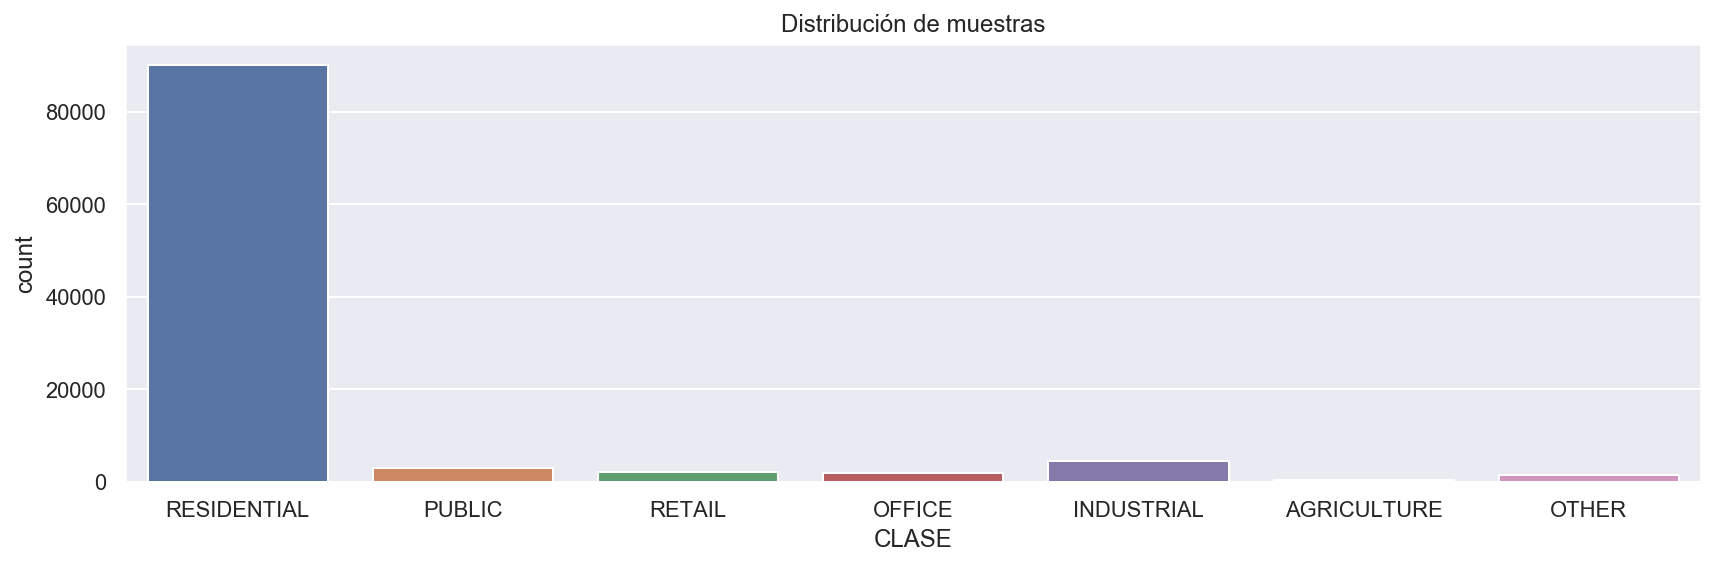

In [6]:
plt.figure(figsize=(12,4))
sns.countplot(x='CLASE', data=df_minsait, order=list_class_order)
plt.title('Distribución de muestras')
plt.tight_layout()
plt.show()

In [7]:
df_minsait.describe()

,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,Q_R_4_0_7,...,Q_NIR_8_0_8,Q_NIR_8_0_9,Q_NIR_8_1_0,AREA,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4,CONTRUCTIONYEAR,MAXBUILDINGFLOOR
count,1.032300e+05,1.032300e+05,1.032300e+05,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,...,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103210.000000
mean,2.208858e+09,1.655955e+08,4.578804e-05,382.633602,548.659095,684.016575,811.053925,939.978002,1080.127592,1242.841586,...,2328.363095,2738.622278,7748.293927,441.123610,0.563343,0.062482,0.061855,1.074327,1972.552436,3.766709
std,2.751723e+07,2.040199e+05,3.168761e-03,99.470870,121.439858,137.763573,153.486424,169.546408,186.422410,206.993926,...,295.852549,365.812714,2795.775635,1869.705189,0.174141,0.042849,0.042295,0.541156,22.335987,2.944896
min,2.120751e+09,1.650957e+08,0.000000e+00,151.000375,184.999420,214.000473,239.999503,269.999451,310.999493,382.999844,...,1861.006226,2172.992676,4085.049076,0.038770,0.000626,0.000679,0.000770,0.015157,1820.000000,0.000000
25%,2.194235e+09,1.654515e+08,0.000000e+00,316.997635,492.003845,632.999634,753.999597,875.008087,1006.997498,1173.999329,...,2126.002441,2478.998193,6051.309064,97.477454,0.455183,0.038255,0.038153,0.801352,1960.000000,1.000000
50%,2.205985e+09,1.655907e+08,0.000000e+00,385.000995,562.997583,698.003998,833.996582,969.999817,1115.001489,1268.997705,...,2313.999268,2688.000000,6798.207198,171.554907,0.536336,0.055802,0.055036,0.997175,1972.000000,4.000000
75%,2.224105e+09,1.657138e+08,5.786675e-07,445.002853,627.001038,770.001611,904.999988,1042.505188,1200.006226,1348.996033,...,2491.004199,2940.996704,8033.479864,343.563671,0.674723,0.078477,0.078064,1.223456,1989.000000,5.000000
max,2.287300e+09,1.665046e+08,1.016050e+00,833.999402,1016.000732,1200.003003,1377.999927,1570.504517,1806.002686,2175.694824,...,3750.997559,4614.998535,15848.608811,238058.952253,1.000000,1.785714,2.631579,68.812431,2017.000000,25.000000


In [12]:
df_minsait.columns

Index(['X', 'Y', 'Q_R_4_0_0', 'Q_R_4_0_1', 'Q_R_4_0_2', 'Q_R_4_0_3',
       'Q_R_4_0_4', 'Q_R_4_0_5', 'Q_R_4_0_6', 'Q_R_4_0_7', 'Q_R_4_0_8',
       'Q_R_4_0_9', 'Q_R_4_1_0', 'Q_G_3_0_0', 'Q_G_3_0_1', 'Q_G_3_0_2',
       'Q_G_3_0_3', 'Q_G_3_0_4', 'Q_G_3_0_5', 'Q_G_3_0_6', 'Q_G_3_0_7',
       'Q_G_3_0_8', 'Q_G_3_0_9', 'Q_G_3_1_0', 'Q_B_2_0_0', 'Q_B_2_0_1',
       'Q_B_2_0_2', 'Q_B_2_0_3', 'Q_B_2_0_4', 'Q_B_2_0_5', 'Q_B_2_0_6',
       'Q_B_2_0_7', 'Q_B_2_0_8', 'Q_B_2_0_9', 'Q_B_2_1_0', 'Q_NIR_8_0_0',
       'Q_NIR_8_0_1', 'Q_NIR_8_0_2', 'Q_NIR_8_0_3', 'Q_NIR_8_0_4',
       'Q_NIR_8_0_5', 'Q_NIR_8_0_6', 'Q_NIR_8_0_7', 'Q_NIR_8_0_8',
       'Q_NIR_8_0_9', 'Q_NIR_8_1_0', 'AREA', 'GEOM_R1', 'GEOM_R2', 'GEOM_R3',
       'GEOM_R4', 'CONTRUCTIONYEAR', 'MAXBUILDINGFLOOR', 'CADASTRALQUALITYID',
       'CLASE'],
      dtype='object')

---
## Análisis exploratorio

Primeramente vamos a obtener información sobre la variable *CLASE*, que es la variable objetivo de nuestro problema:

In [14]:
df_minsait['CLASE'].value_counts()

RESIDENTIAL    90173
INDUSTRIAL      4490
PUBLIC          2976
RETAIL          2093
OFFICE          1828
OTHER           1332
AGRICULTURE      338
Name: CLASE, dtype: int64

Como podemos ver, nos encontramos con un conjunto de datos muy desbalanceado, ya que se presentan un gran número de registros pertencientes a la clase de *RESIDENTIAL*. Por ello, vamos a realizar un análsis exploratorio de los datos, ya que también contamos con un amplio número de características.

Para ello, lo primero que haremos es realizar una división de las características en función de su tipo:

In [28]:
dis_df_columns = df_minsait.select_dtypes(exclude=np.number).columns.tolist()
#dis_df_columns.remove('CLASE') #Eliminamos la variable clase
number_df_columns = df_minsait.select_dtypes(include=np.number).columns.tolist()

print('Discretas: ',dis_df_columns)
print('\nNuméricas: ',number_df_columns)

Discretas:  ['CADASTRALQUALITYID', 'CLASE']

Numéricas:  ['X', 'Y', 'Q_R_4_0_0', 'Q_R_4_0_1', 'Q_R_4_0_2', 'Q_R_4_0_3', 'Q_R_4_0_4', 'Q_R_4_0_5', 'Q_R_4_0_6', 'Q_R_4_0_7', 'Q_R_4_0_8', 'Q_R_4_0_9', 'Q_R_4_1_0', 'Q_G_3_0_0', 'Q_G_3_0_1', 'Q_G_3_0_2', 'Q_G_3_0_3', 'Q_G_3_0_4', 'Q_G_3_0_5', 'Q_G_3_0_6', 'Q_G_3_0_7', 'Q_G_3_0_8', 'Q_G_3_0_9', 'Q_G_3_1_0', 'Q_B_2_0_0', 'Q_B_2_0_1', 'Q_B_2_0_2', 'Q_B_2_0_3', 'Q_B_2_0_4', 'Q_B_2_0_5', 'Q_B_2_0_6', 'Q_B_2_0_7', 'Q_B_2_0_8', 'Q_B_2_0_9', 'Q_B_2_1_0', 'Q_NIR_8_0_0', 'Q_NIR_8_0_1', 'Q_NIR_8_0_2', 'Q_NIR_8_0_3', 'Q_NIR_8_0_4', 'Q_NIR_8_0_5', 'Q_NIR_8_0_6', 'Q_NIR_8_0_7', 'Q_NIR_8_0_8', 'Q_NIR_8_0_9', 'Q_NIR_8_1_0', 'AREA', 'GEOM_R1', 'GEOM_R2', 'GEOM_R3', 'GEOM_R4', 'CONTRUCTIONYEAR', 'MAXBUILDINGFLOOR']


Como se puede observar, de primeras unicamente contamos con dos variables discretas (incluyendo la variable objetivo) mientras que el resto se tratan de variables numéricas. Vamos a realizar un anális en profunidad para cada uno de estos dos tipos:

## <font color="#004D7F">Tratamiento de las columnas numéricas </font>

El tratamiento de las columnas numéricas es relativamente sencillo, y se puede descomponer en varias etapas:

* Comprobar que, efectivamente, corresponden a características numéricas. 
* Detección y tratamiento de outliers. 
* Detección y tratemiento de valores perdidos. 
* Exploración de las variables. 

In [31]:
num_df_values = [(col, len(df_minsait[col].value_counts())) for col in number_df_columns]
num_df_values

[('X', 103132),
 ('Y', 93969),
 ('Q_R_4_0_0', 141),
 ('Q_R_4_0_1', 230),
 ('Q_R_4_0_2', 230),
 ('Q_R_4_0_3', 230),
 ('Q_R_4_0_4', 230),
 ('Q_R_4_0_5', 230),
 ('Q_R_4_0_6', 229),
 ('Q_R_4_0_7', 230),
 ('Q_R_4_0_8', 230),
 ('Q_R_4_0_9', 230),
 ('Q_R_4_1_0', 229),
 ('Q_G_3_0_0', 172),
 ('Q_G_3_0_1', 230),
 ('Q_G_3_0_2', 229),
 ('Q_G_3_0_3', 230),
 ('Q_G_3_0_4', 229),
 ('Q_G_3_0_5', 230),
 ('Q_G_3_0_6', 230),
 ('Q_G_3_0_7', 230),
 ('Q_G_3_0_8', 230),
 ('Q_G_3_0_9', 230),
 ('Q_G_3_1_0', 228),
 ('Q_B_2_0_0', 211),
 ('Q_B_2_0_1', 229),
 ('Q_B_2_0_2', 226),
 ('Q_B_2_0_3', 227),
 ('Q_B_2_0_4', 227),
 ('Q_B_2_0_5', 227),
 ('Q_B_2_0_6', 227),
 ('Q_B_2_0_7', 228),
 ('Q_B_2_0_8', 230),
 ('Q_B_2_0_9', 229),
 ('Q_B_2_1_0', 228),
 ('Q_NIR_8_0_0', 207),
 ('Q_NIR_8_0_1', 230),
 ('Q_NIR_8_0_2', 230),
 ('Q_NIR_8_0_3', 230),
 ('Q_NIR_8_0_4', 230),
 ('Q_NIR_8_0_5', 230),
 ('Q_NIR_8_0_6', 229),
 ('Q_NIR_8_0_7', 230),
 ('Q_NIR_8_0_8', 230),
 ('Q_NIR_8_0_9', 230),
 ('Q_NIR_8_1_0', 228),
 ('AREA', 103226),
 ('G

Por lo que parece, todas las variables ellas son numéricas y no se debe de realizar ningun cambio para ellas

### <font color="#004D7F"> Outliers </font>

Para la visualización e interpretación de outliers, vamos a clasificar las variables numéricas en tres grupos, que son los siguientes:

- **Colores:** 'Q_R_4_0_0', 'Q_R_4_0_1', 'Q_R_4_0_2', 'Q_R_4_0_3', 'Q_R_4_0_4', 'Q_R_4_0_5', 'Q_R_4_0_6', 'Q_R_4_0_7', 'Q_R_4_0_8', 'Q_R_4_0_9', 'Q_R_4_1_0', 'Q_G_3_0_0', 'Q_G_3_0_1', 'Q_G_3_0_2', 'Q_G_3_0_3', 'Q_G_3_0_4', 'Q_G_3_0_5', 'Q_G_3_0_6', 'Q_G_3_0_7', 'Q_G_3_0_8', 'Q_G_3_0_9', 'Q_G_3_1_0', 'Q_B_2_0_0', 'Q_B_2_0_1', 'Q_B_2_0_2', 'Q_B_2_0_3', 'Q_B_2_0_4', 'Q_B_2_0_5', 'Q_B_2_0_6', 'Q_B_2_0_7', 'Q_B_2_0_8', 'Q_B_2_0_9', 'Q_B_2_1_0', 'Q_NIR_8_0_0', 'Q_NIR_8_0_1', 'Q_NIR_8_0_2', 'Q_NIR_8_0_3', 'Q_NIR_8_0_4', 'Q_NIR_8_0_5', 'Q_NIR_8_0_6', 'Q_NIR_8_0_7', 'Q_NIR_8_0_8', 'Q_NIR_8_0_9', 'Q_NIR_8_1_0'
- **Geométricas:** 'AREA', 'GEOM_R1', 'GEOM_R2', 'GEOM_R3', 'GEOM_R4'
- **Otras:** 'CONTRUCTIONYEAR', 'MAXBUILDINGFLOOR'

In [35]:
colors = ['Q_R_4_0_0', 'Q_R_4_0_1', 'Q_R_4_0_2', 'Q_R_4_0_3', 'Q_R_4_0_4', 'Q_R_4_0_5', 'Q_R_4_0_6', 'Q_R_4_0_7',
          'Q_R_4_0_8', 'Q_R_4_0_9', 'Q_R_4_1_0', 'Q_G_3_0_0', 'Q_G_3_0_1', 'Q_G_3_0_2', 'Q_G_3_0_3', 'Q_G_3_0_4',
          'Q_G_3_0_5', 'Q_G_3_0_6', 'Q_G_3_0_7', 'Q_G_3_0_8', 'Q_G_3_0_9', 'Q_G_3_1_0', 'Q_B_2_0_0', 'Q_B_2_0_1',
          'Q_B_2_0_2', 'Q_B_2_0_3', 'Q_B_2_0_4', 'Q_B_2_0_5', 'Q_B_2_0_6', 'Q_B_2_0_7', 'Q_B_2_0_8', 'Q_B_2_0_9',
          'Q_B_2_1_0', 'Q_NIR_8_0_0', 'Q_NIR_8_0_1', 'Q_NIR_8_0_2', 'Q_NIR_8_0_3', 'Q_NIR_8_0_4', 'Q_NIR_8_0_5', 
          'Q_NIR_8_0_6', 'Q_NIR_8_0_7', 'Q_NIR_8_0_8', 'Q_NIR_8_0_9', 'Q_NIR_8_1_0']
geom = ['AREA', 'GEOM_R1', 'GEOM_R2', 'GEOM_R3', 'GEOM_R4']
others = ['CONTRUCTIONYEAR', 'MAXBUILDINGFLOOR']
# Mirar donde incluir X e Y

##### <font color="#004D7F"> Variable Colores </font>

In [121]:
df_minsait[colors].describe()

,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,Q_R_4_0_7,Q_R_4_0_8,Q_R_4_0_9,...,Q_NIR_8_0_1,Q_NIR_8_0_2,Q_NIR_8_0_3,Q_NIR_8_0_4,Q_NIR_8_0_5,Q_NIR_8_0_6,Q_NIR_8_0_7,Q_NIR_8_0_8,Q_NIR_8_0_9,Q_NIR_8_1_0
count,1.032300e+05,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,...,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000
mean,4.578804e-05,382.633602,548.659095,684.016575,811.053925,939.978002,1080.127592,1242.841586,1455.156651,1790.156782,...,814.276061,1102.612169,1315.749309,1499.915698,1676.426383,1860.014128,2066.630198,2328.363095,2738.622278,7748.293927
std,3.168761e-03,99.470870,121.439858,137.763573,153.486424,169.546408,186.422410,206.993926,234.809582,269.389796,...,228.324271,234.721672,234.891233,235.476530,239.760730,248.165718,264.334062,295.852549,365.812714,2795.775635
min,0.000000e+00,151.000375,184.999420,214.000473,239.999503,269.999451,310.999493,382.999844,459.001373,591.000671,...,328.703671,700.003967,914.001007,1099.995972,1264.005249,1435.997559,1632.993774,1861.006226,2172.992676,4085.049076
25%,0.000000e+00,316.997635,492.003845,632.999634,753.999597,875.008087,1006.997498,1173.999329,1378.988965,1691.304590,...,649.703033,952.999451,1151.004639,1336.003833,1513.998901,1692.994263,1878.997437,2126.002441,2478.998193,6051.309064
50%,0.000000e+00,385.000995,562.997583,698.003998,833.996582,969.999817,1115.001489,1268.997705,1479.002441,1783.003601,...,782.505676,1088.002075,1328.011536,1525.002368,1700.000305,1873.000610,2067.002441,2313.999268,2688.000000,6798.207198
75%,5.786675e-07,445.002853,627.001038,770.001611,904.999988,1042.505188,1200.006226,1348.996033,1550.000244,1884.999426,...,935.499146,1222.998193,1436.998584,1628.998413,1808.002502,1978.989258,2194.001978,2491.004199,2940.996704,8033.479864
max,1.016050e+00,833.999402,1016.000732,1200.003003,1377.999927,1570.504517,1806.002686,2175.694824,2575.792188,2940.000635,...,2055.998657,2324.008301,2579.501465,2801.996582,2983.994995,3158.000488,3408.002808,3750.997559,4614.998535,15848.608811


Como estudiar la correlación de todas y cada una de las variables relacionadas con el color es inviable y no se observarían correctamente los datos, lo que haremos es un agrupamiento por colores, es decir, tendremos lo siguiente:

- **Rojo**
- **Verde**
- **Azul**
- **NIR**

In [125]:
# Correlación perteneciente al color rojo
df_minsait[colors[:11]].corr().style.background_gradient()

,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,Q_R_4_0_7,Q_R_4_0_8,Q_R_4_0_9,Q_R_4_1_0
Q_R_4_0_0,1,0.0223746,0.013366,0.00949374,0.00733973,0.00560894,0.00412339,0.00233086,5.23502e-05,-0.00283271,-0.00688557
Q_R_4_0_1,0.0223746,1,0.954936,0.8941,0.840219,0.795516,0.756508,0.71814,0.672871,0.620128,0.0630813
Q_R_4_0_2,0.013366,0.954936,1,0.983754,0.953144,0.920097,0.885947,0.848161,0.799387,0.737348,0.098207
Q_R_4_0_3,0.00949374,0.8941,0.983754,1,0.990889,0.971235,0.945026,0.910721,0.861848,0.795886,0.135227
Q_R_4_0_4,0.00733973,0.840219,0.953144,0.990889,1,0.993403,0.975967,0.946813,0.900021,0.833015,0.171646
Q_R_4_0_5,0.00560894,0.795516,0.920097,0.971235,0.993403,1,0.993787,0.973549,0.933866,0.870551,0.199157
Q_R_4_0_6,0.00412339,0.756508,0.885947,0.945026,0.975967,0.993787,1,0.991934,0.963726,0.908705,0.221726
Q_R_4_0_7,0.00233086,0.71814,0.848161,0.910721,0.946813,0.973549,0.991934,1,0.988779,0.947377,0.230322
Q_R_4_0_8,5.23502e-05,0.672871,0.799387,0.861848,0.900021,0.933866,0.963726,0.988779,1,0.980449,0.231288
Q_R_4_0_9,-0.00283271,0.620128,0.737348,0.795886,0.833015,0.870551,0.908705,0.947377,0.980449,1,0.221877


Para el color rojo podemos observar que existe una gran correlación entre casi todas las variables, excepto con las pertenecientes al decil 0 y 10. Por otro lado se puede observar que cada una de ellas presenta una mayor correlación con su respectivo antecesor y sucesor. Por ejemplo, la variable *Q_R_4_0_5* presenta una mayor correlación con *Q_R_4_0_4* y *Q_R_4_0_6*

Como excepción, decir que el decil 9 (*Q_R_4_0_9*) presenta una mayor correlación con sus dos antecesores.

In [129]:
# Correlación perteneciente al color verde
df_minsait[colors[11:22]].corr().style.background_gradient()

,Q_G_3_0_0,Q_G_3_0_1,Q_G_3_0_2,Q_G_3_0_3,Q_G_3_0_4,Q_G_3_0_5,Q_G_3_0_6,Q_G_3_0_7,Q_G_3_0_8,Q_G_3_0_9,Q_G_3_1_0
Q_G_3_0_0,1,0.00815616,0.00406045,-0.00114835,-0.005727,-0.00960957,-0.012989,-0.0158153,-0.0183652,-0.0218134,-0.016288
Q_G_3_0_1,0.00815616,1,0.946216,0.875788,0.817135,0.770695,0.730447,0.692119,0.645263,0.58896,0.0477564
Q_G_3_0_2,0.00406045,0.946216,1,0.981479,0.947613,0.90916,0.867979,0.822892,0.767582,0.705775,0.0912458
Q_G_3_0_3,-0.00114835,0.875788,0.981479,1,0.989796,0.965326,0.930715,0.887001,0.831044,0.769389,0.125461
Q_G_3_0_4,-0.005727,0.817135,0.947613,0.989796,1,0.991312,0.967614,0.930546,0.87876,0.819671,0.153531
Q_G_3_0_5,-0.00960957,0.770695,0.90916,0.965326,0.991312,1,0.991395,0.966208,0.923895,0.869392,0.168315
Q_G_3_0_6,-0.012989,0.730447,0.867979,0.930715,0.967614,0.991395,1,0.990853,0.962197,0.915404,0.171063
Q_G_3_0_7,-0.0158153,0.692119,0.822892,0.887001,0.930546,0.966208,0.990853,1,0.9886,0.952194,0.161478
Q_G_3_0_8,-0.0183652,0.645263,0.767582,0.831044,0.87876,0.923895,0.962197,0.9886,1,0.982217,0.158037
Q_G_3_0_9,-0.0218134,0.58896,0.705775,0.769389,0.819671,0.869392,0.915404,0.952194,0.982217,1,0.147395


En el caso del color verde ocurre exactamente lo mismo que para el color rojo, ya que la máxima correlación la presentan con su decil anterior y posterior.

In [135]:
# Correlación perteneciente al color azul
df_minsait[colors[22:33]].corr().style.background_gradient()

,Q_B_2_0_0,Q_B_2_0_1,Q_B_2_0_2,Q_B_2_0_3,Q_B_2_0_4,Q_B_2_0_5,Q_B_2_0_6,Q_B_2_0_7,Q_B_2_0_8,Q_B_2_0_9,Q_B_2_1_0
Q_B_2_0_0,1,0.606531,0.508554,0.438038,0.370206,0.297519,0.216874,0.129162,0.0513382,-0.0161104,-0.123766
Q_B_2_0_1,0.606531,1,0.959336,0.904366,0.843239,0.759388,0.651665,0.528908,0.411626,0.313599,0.183415
Q_B_2_0_2,0.508554,0.959336,1,0.982315,0.942917,0.870116,0.766459,0.642727,0.520351,0.414512,0.221036
Q_B_2_0_3,0.438038,0.904366,0.982315,1,0.986352,0.934339,0.845546,0.731083,0.612334,0.504607,0.249095
Q_B_2_0_4,0.370206,0.843239,0.942917,0.986352,1,0.976825,0.912365,0.816255,0.707907,0.602881,0.2724
Q_B_2_0_5,0.297519,0.759388,0.870116,0.934339,0.976825,1,0.975725,0.909965,0.820666,0.722946,0.299674
Q_B_2_0_6,0.216874,0.651665,0.766459,0.845546,0.912365,0.975725,1,0.976999,0.918451,0.83528,0.316419
Q_B_2_0_7,0.129162,0.528908,0.642727,0.731083,0.816255,0.909965,0.976999,1,0.978856,0.917962,0.329449
Q_B_2_0_8,0.0513382,0.411626,0.520351,0.612334,0.707907,0.820666,0.918451,0.978856,1,0.973118,0.359656
Q_B_2_0_9,-0.0161104,0.313599,0.414512,0.504607,0.602881,0.722946,0.83528,0.917962,0.973118,1,0.413665


Ocurre lo mismo con el color azul y también para el NIR.

In [139]:
# Correlación perteneciente al color azul
df_minsait[colors[33:44]].corr().style.background_gradient()

,Q_NIR_8_0_0,Q_NIR_8_0_1,Q_NIR_8_0_2,Q_NIR_8_0_3,Q_NIR_8_0_4,Q_NIR_8_0_5,Q_NIR_8_0_6,Q_NIR_8_0_7,Q_NIR_8_0_8,Q_NIR_8_0_9,Q_NIR_8_1_0
Q_NIR_8_0_0,1,0.173045,0.146892,0.130739,0.116522,0.101781,0.0859692,0.0687318,0.0486,0.0244436,-0.0450318
Q_NIR_8_0_1,0.173045,1,0.984966,0.957518,0.923092,0.883855,0.835749,0.782335,0.722126,0.646545,-0.0973688
Q_NIR_8_0_2,0.146892,0.984966,1,0.991936,0.972216,0.943889,0.90487,0.857902,0.80041,0.720046,-0.0849649
Q_NIR_8_0_3,0.130739,0.957518,0.991936,1,0.993603,0.976105,0.946767,0.907562,0.8557,0.775895,-0.0837934
Q_NIR_8_0_4,0.116522,0.923092,0.972216,0.993603,1,0.993923,0.975226,0.944982,0.900132,0.822607,-0.0808757
Q_NIR_8_0_5,0.101781,0.883855,0.943889,0.976105,0.993923,1,0.993283,0.97344,0.936793,0.862418,-0.080759
Q_NIR_8_0_6,0.0859692,0.835749,0.90487,0.946767,0.975226,0.993283,1,0.992832,0.967274,0.89905,-0.0759639
Q_NIR_8_0_7,0.0687318,0.782335,0.857902,0.907562,0.944982,0.97344,0.992832,1,0.989372,0.933932,-0.0704004
Q_NIR_8_0_8,0.0486,0.722126,0.80041,0.8557,0.900132,0.936793,0.967274,0.989372,1,0.971997,-0.0547814
Q_NIR_8_0_9,0.0244436,0.646545,0.720046,0.775895,0.822607,0.862418,0.89905,0.933932,0.971997,1,-0.0372325


##### <font color="#004D7F"> Variables Geométricas </font>

Como se ha hecho la división anterior, se pueden ver los rangos que toman las variables.

In [34]:
df_minsait[geom].describe()

,AREA,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4
count,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000
mean,441.123610,0.563343,0.062482,0.061855,1.074327
std,1869.705189,0.174141,0.042849,0.042295,0.541156
min,0.038770,0.000626,0.000679,0.000770,0.015157
25%,97.477454,0.455183,0.038255,0.038153,0.801352
50%,171.554907,0.536336,0.055802,0.055036,0.997175
75%,343.563671,0.674723,0.078477,0.078064,1.223456
max,238058.952253,1.000000,1.785714,2.631579,68.812431


En este caso podemos observar que existe una gran diferencia y que los valores máximos y mínimos se alejan enormemente de los rangos. Por ello mismo, se ha decidido eliminar lo que actualmente se consideran outliers.

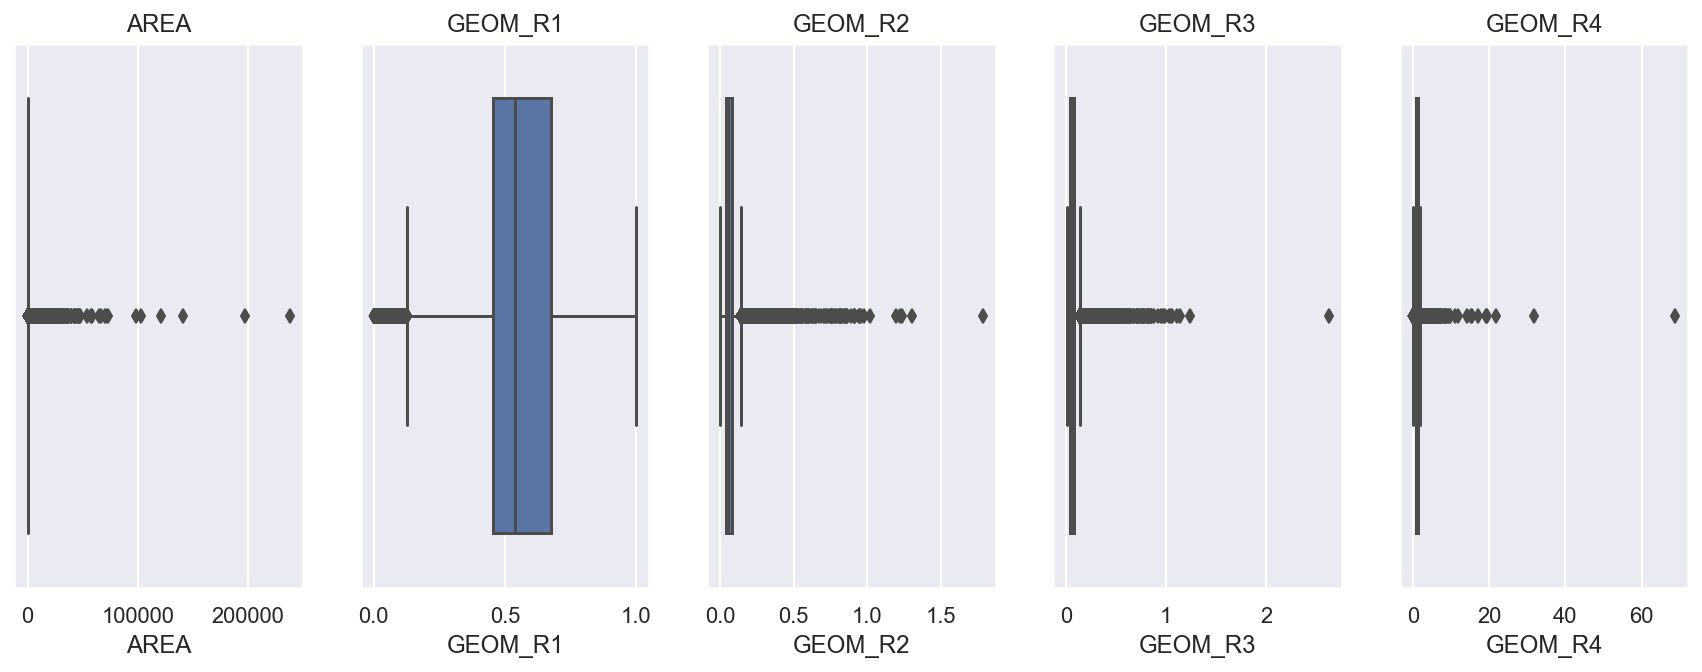

In [60]:
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
for col, ax in enumerate(axs.flatten()):
    col_name = geom[col]
    sns.boxplot(x=df_minsait[col_name], ax=ax)
    ax.set_title(col_name);    
    ax.set_yticks([])

In [108]:
# De momento con Area solamente pero plantear con el resto
third_quantile_area = df_minsait['AREA'].quantile(0.75)
geom_quantile_area = df_minsait[df_minsait['AREA'] < third_quantile]

In [109]:
geom_quantile_area[geom].describe()

,AREA,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4
count,77422.000000,77422.000000,77422.000000,77422.000000,77422.000000
mean,147.469129,0.576273,0.073881,0.073157,1.071818
std,81.833285,0.167612,0.043264,0.042667,0.549983
min,0.038770,0.000626,0.002750,0.001626,0.015157
25%,80.984772,0.470717,0.050090,0.049776,0.804299
50%,129.110699,0.543919,0.065617,0.064853,0.997863
75%,203.565554,0.680012,0.086462,0.085985,1.220286
max,343.546207,1.000000,1.785714,2.631579,68.812431


In [120]:
with_outliers = df_minsait.corr()[['AREA']]
with_outliers.style.background_gradient()

,AREA
X,0.0282305
Y,-0.00448588
Q_R_4_0_0,0.00145163
Q_R_4_0_1,0.0304078
Q_R_4_0_2,0.0308048
Q_R_4_0_3,0.0320902
Q_R_4_0_4,0.034419
Q_R_4_0_5,0.0380233
Q_R_4_0_6,0.0431031
Q_R_4_0_7,0.0492271


In [119]:
without_outliers = df_minsait[df_minsait["AREA"] < third_quantile_area].corr()[['AREA']]
without_outliers.style.background_gradient()

,AREA
X,-0.0482024
Y,0.0195964
Q_R_4_0_0,-0.0982226
Q_R_4_0_1,-0.0858176
Q_R_4_0_2,-0.0481802
Q_R_4_0_3,-0.0206303
Q_R_4_0_4,-0.0019557
Q_R_4_0_5,0.0069561
Q_R_4_0_6,0.0108747
Q_R_4_0_7,0.0127964


Podemos observar que el hecho de eliminar outliers en la variable *AREA* mejora la correlación, pero no tanto como se esperaba, con el resto de variables de nuestro conjunto de datos.

##### <font color="#004D7F"> Otras </font>

In [36]:
df_minsait[others].describe()

,CONTRUCTIONYEAR,MAXBUILDINGFLOOR
count,103230.000000,103210.000000
mean,1972.552436,3.766709
std,22.335987,2.944896
min,1820.000000,0.000000
25%,1960.000000,1.000000
50%,1972.000000,4.000000
75%,1989.000000,5.000000
max,2017.000000,25.000000


In [144]:
# Pensar cómo interpretar los que tienen 0 pisos
df_minsait[others]['MAXBUILDINGFLOOR'].value_counts()

1.0     34548
5.0     16296
4.0     14683
3.0      8787
6.0      7130
7.0      5341
2.0      3923
8.0      3586
0.0      2628
9.0      1787
10.0     1370
12.0      795
11.0      706
13.0      635
14.0      474
15.0      175
16.0      128
17.0       86
21.0       49
22.0       21
18.0       20
25.0       16
23.0       16
19.0        6
24.0        3
20.0        1
Name: MAXBUILDINGFLOOR, dtype: int64

### <font color="#004D7F"> Valores perdidos </font>

En este apartado se va a realizar una análisis de los valores perdidos de nuestro conjunto de datos.

In [147]:
df_minsait.isna().sum()[df_minsait.isna().sum()>0]

MAXBUILDINGFLOOR      20
CADASTRALQUALITYID    20
dtype: int64

Como unicamente presenta 40 valores perdidos en total, vamos a revisar cuales son estos valores perdidos

In [152]:
df_minsait[df_minsait.isna().any(axis=1)]

,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,Q_R_4_0_7,...,Q_NIR_8_1_0,AREA,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4,CONTRUCTIONYEAR,MAXBUILDINGFLOOR,CADASTRALQUALITYID,CLASE
ID,,,,,,,,,,,,,,,,,,,,,
B7DE3FE20084F9FA,2254413625,165244276,0.000597,592.998193,742.001184,855.996881,976.798755,1106.998474,1238.995532,1386.001807,...,6763.517046,2120.276750,0.465508,0.015959,0.013757,0.862017,1975,NaN,NaN,INDUSTRIAL
5D08956CDC0B7C37,2250193143,165232359,0.000000,648.000018,788.999866,894.999255,987.001318,1079.999817,1184.999121,1317.997363,...,6084.405066,1999.778850,0.531552,0.016810,0.015813,0.940702,1975,NaN,NaN,AGRICULTURE
20D3200047F4D73A,2254610358,165241603,0.000597,592.998193,742.001184,855.996881,976.798755,1106.998474,1238.995532,1386.001807,...,6763.517046,723.268350,0.563042,0.036284,0.021455,0.591289,1975,NaN,NaN,AGRICULTURE
82489ECC7BDFB0B0,2250087048,165252257,0.000000,648.000018,788.999866,894.999255,987.001318,1079.999817,1184.999121,1317.997363,...,6084.405066,1829.160728,0.153173,0.009619,0.008705,0.905010,1975,NaN,NaN,RETAIL
6447D96932B64C3F,2250800402,165234583,0.000000,648.000018,788.999866,894.999255,987.001318,1079.999817,1184.999121,1317.997363,...,6084.405066,249.497550,0.361907,0.040209,0.036075,0.897186,1975,NaN,NaN,AGRICULTURE
8BF6E2CB5B152739,2248534716,165225185,0.000000,648.000018,788.999866,894.999255,987.001318,1079.999817,1184.999121,1317.997363,...,6084.405066,159.968400,0.294582,0.042373,0.043459,1.025641,1975,NaN,NaN,AGRICULTURE
621448B2B12E3B3E,2233865202,165097257,0.000009,609.998492,778.999695,889.001544,976.000098,1068.000366,1169.998853,1271.998901,...,5208.317414,710.658165,0.115690,0.014473,0.011248,0.777191,1950,NaN,NaN,AGRICULTURE
042ABAFAE9B5BDB9,2246045656,165214428,0.000000,648.000018,788.999866,894.999255,987.001318,1079.999817,1184.999121,1317.997363,...,6084.405066,4112.808185,0.028464,0.003521,0.001966,0.558325,1966,NaN,NaN,INDUSTRIAL
55B7201B5219C83B,2260254994,165132637,0.000004,437.000958,597.003247,711.998651,806.999329,910.999084,1039.000195,1183.999719,...,5922.090811,47.266733,0.043968,0.031348,0.029674,0.946588,1982,NaN,NaN,AGRICULTURE


Vemos que en realidad estos 40 valores perdidos corresponden unicamente con 20 registros de nuestro conjunto de datos, ya que casualmente los valores perdidos se presentan de forma simultánea tanto en la variable *CONTRUCTIONYEAR* como *MAXBUILDINGFLOOR*. Dado los valores perdidos pertenecen a las clases más desbalanceadas de nuestro conjunto se debe de tomar la decisión de qué hacer con los valores perdidos. 

También se debe de tener en cuenta que la variable *CONTRUCTIONYEAR* tiene un orden que indica la calidad del terreno, por lo que no podríamos establecer cualquier valor. Esta decisión se resolverá más adelante.

### <font color="#004D7F">Tratamiento de las columnas discretas </font>


En relación a estas columnas, dos aspectos muy relevantes de cara a la construcción de un modelo con `scikit-learn` son: el número de valores que puede tomar cada una; y si existe una relación de orden entre estos valores. Estos factores determinan el tipo de transformación que se ha de hacer. Existen cuatro posibilidades:

* Cuando la columna toma dos valores, se puede binarizar y convertir a numérica diréctamente. 
* Si el tamaño del conjunto de valores es mayor que dos, y no existe una relación de orden entre ellos, se aplica _One Hot Encoding_ (se aplicará posteriormente en el `Pipeline` de transformaciones).
* Si existe una relación de orden, los valores se transforman a numéricos, sustituyendo cada valor por su orden. 
* Si el conjunto de valores extremadamente grande se ha de explorar, ya que es muy posible que se trate de un error.

In [159]:
num_values_dis_df_col = [(col, len(df_minsait[col].value_counts())) for col in dis_df_columns]
num_values_dis_df_col

[('CADASTRALQUALITYID', 12), ('CLASE', 7)]

Dado que también se encuentra la variable objetivo, es conveniente eliminarla de la lista y trabajar unicamente con la variable restante.

In [161]:
dis_df_columns.remove('CLASE')

4    24621
6    24528
5    19473
7    13799
3    10209
8     5547
2     2980
9     1105
1      652
C      216
B       43
A       37
Name: CADASTRALQUALITYID, dtype: int64

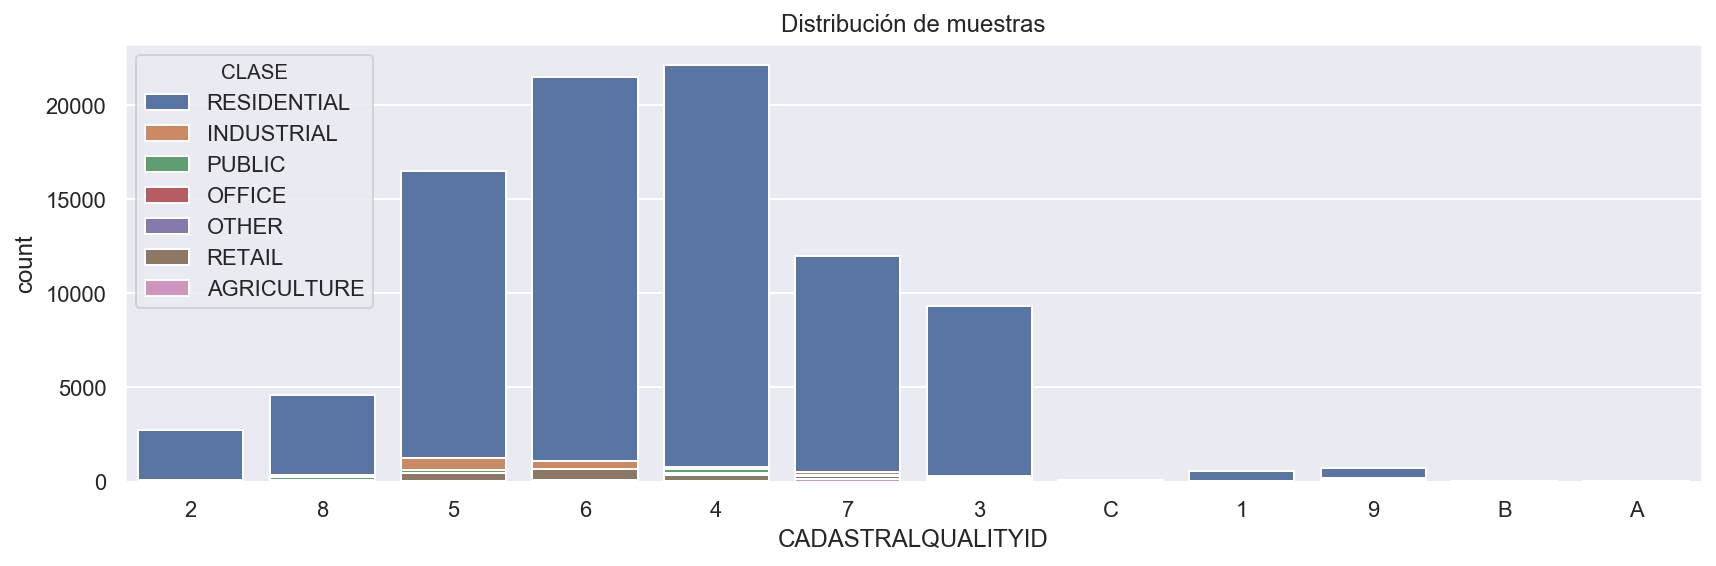

In [181]:
plt.figure(figsize=(12,4))
sns.countplot(x=col_name, data=df_minsait, hue="CLASE", dodge=False)
plt.title('Distribución de muestras');
plt.tight_layout()
df_minsait['CADASTRALQUALITYID'].value_counts()

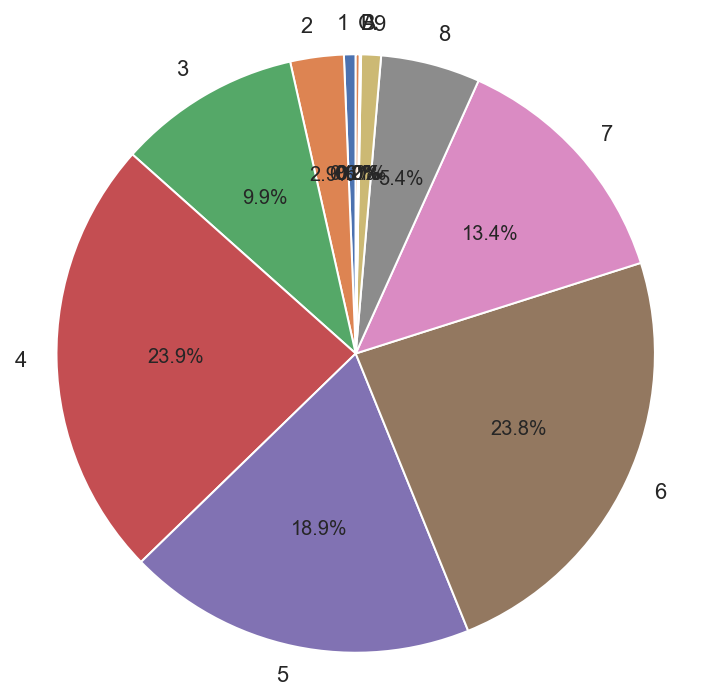

In [199]:
# Creamos la figura
plt.figure(figsize=(6,6))
plt.pie(df_minsait.groupby('CADASTRALQUALITYID')['AREA'].count(), labels=df_minsait.groupby('CADASTRALQUALITYID')['CLASE'].count().index, autopct='%1.1f%%', startangle=90)
plt.axis('equal');

Se puede contemplar que el número de casos que se presentan está muy desbalanceado a causa de la clase *RESIDENTIAL*.

In [189]:
df_minsait.groupby('CADASTRALQUALITYID')[['CLASE', 'AREA']].describe()

AREA                                                   \
                      count         mean          std        min         25%   
CADASTRALQUALITYID                                                             
1                     652.0   547.119663   857.896256   3.371883  251.062450   
2                    2980.0   455.005018   803.150762   2.035850  156.287640   
3                   10209.0   476.807796  1249.184737   0.062300  105.859303   
4                   24621.0   466.434593  1807.907277   0.409160   87.003630   
5                   19473.0   466.516116  1461.024331   0.687749  113.610510   
6                   24528.0   360.560661  1362.972002   0.168230  108.744969   
7                   13799.0   374.394358  2010.995126   0.108403  101.465462   
8                    5547.0   395.668528  2097.581515   0.038770   39.654495   
9                    1105.0  1405.548390  8360.093397   3.556550   91.685403   
A                      37.0  1347.929949  2723.833336  33.544150  428.220930   
B                      43.0  1279.915882  1466.556315   5.553784  537.213511   
C                     216.0  1683.613890  4202.113025   1.000078  239.591536   

                                                            
                           50%          75%            max  
CADASTRALQUALITYID                                          
1                   393.872201   613.593751   14795.492734  
2                   296.167315   476.298493   16673.398505  
3                   200.577850   436.221000   47508.586550  
4                   163.450933   386.926972  197028.469001  
5                   212.669650   387.771320   54270.868307  
6                   175.035963   288.928396   73356.115745  
7                   145.162150   241.150324  140686.383050  
8                    73.818445   172.389592   98047.398600  
9                   173.260342   532.257555  238058.952253  
A                   594.568010   911.943608   15838.923151  
B                   828.621687  1307.325881    7235.982721  
C                   567.913604  1293.775410   37582.556891

Teniendo en cuenta la información que se muestra arriba podemos ver que, por ejemplo, el registro que presenta una mayor área (238058.952253) está catalogado con un ID Catastral de 9 que corresponde al menor de todos y es un poco contraproducente.

---
## Linear Discriminant Analysis (LDA)
Both PCA and LDA are dimensionality reduction algorithms. But where PCA is considered to be an unsupervised algorithm, LDA, on the other hand, is considered to be supervised.
https://towardsdatascience.com/understanding-dimensionality-reduction-for-machine-learning-ad9a3811bd89

In [196]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [197]:
X = df_minsait.drop('CLASE', axis=1)
y = df_minsait['CLASE']

In [198]:
sc = StandardScaler()
X = sc.fit_transform(X)

ValueError: could not convert string to float: 'C'